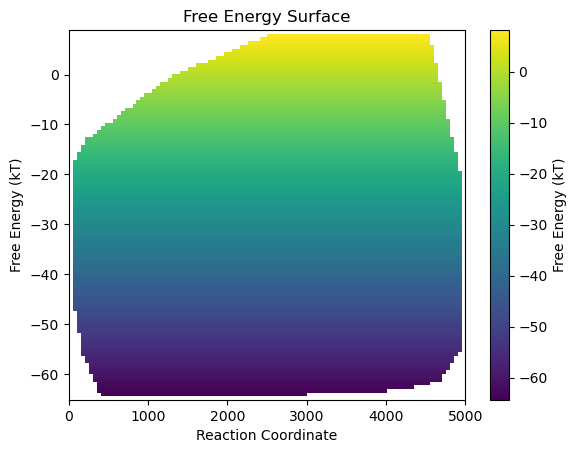

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load potential energy data from the energy.xvg file
data = np.loadtxt('energy.xvg', comments=['#', '@'])

# Assuming the first column is the reaction coordinate
reaction_coord = data[:, 0]

# Assuming the second column is the potential energy
potential_energy = data[:, 1]

# Calculate the free energy surface
kT = 1.0  # Set the value of kT (assuming kT = 1 for simplicity)
free_energy = -np.log(np.exp(-potential_energy))

# Define the grid
grid_resolution = 100  # Number of grid points in each dimension
x_min, x_max = min(reaction_coord), max(reaction_coord)
y_min, y_max = min(free_energy), max(free_energy)
x = np.linspace(x_min, x_max, grid_resolution)
y = np.linspace(y_min, y_max, grid_resolution)

# Create the 2D grid
X, Y = np.meshgrid(x, y)

# Interpolate the free energy values onto the grid
from scipy.interpolate import griddata
Z = griddata((reaction_coord, free_energy), free_energy, (X, Y), method='linear')

# Create a heatmap of the free energy surface
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('Reaction Coordinate')
plt.ylabel('Free Energy (kT)')
plt.title('Free Energy Surface')
plt.show()
